In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [18]:
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.optimizers import Adam
import tensorflow as tf
### YOUR CODE HERE
# Figure out how to import regularizers
from keras import regularizers
###
import keras.utils as ku 
import numpy as np 

In [19]:
tokenizer = Tokenizer()


path_to_file = tf.keras.utils.get_file('sonnets.txt', 'https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt')

data = open(path_to_file, 'rb').read().decode(encoding='utf-8')

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [20]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length = max_sequence_len - 1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(150))
model.add(Dense(total_words/2,  kernel_regularizer=regularizers.l2(0.01), activation = 'relu'))
model.add(Dense(total_words, activation = 'softmax'))
# Pick an optimizer
model.compile(loss = 'categorical_crossentropy', optimizer='adam' , metrics = ['accuracy'])
print(model.summary())


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 10, 100)           321100    
_________________________________________________________________
bidirectional_5 (Bidirection (None, 10, 300)           301200    
_________________________________________________________________
dropout_5 (Dropout)          (None, 10, 300)           0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 150)               270600    
_________________________________________________________________
dense_5 (Dense)              (None, 1605)              242355    
_________________________________________________________________
dense_6 (Dense)              (None, 3211)              5156866   
Total params: 6,292,121
Trainable params: 6,292,121
Non-trainable params: 0
____________________________________________

In [21]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 3s 7ms/step - loss: 1497.3754 - accuracy: 0.0210
Epoch 2/100
484/484 [==============================] - 4s 7ms/step - loss: 435.0764 - accuracy: 0.0217
Epoch 3/100
484/484 [==============================] - 4s 7ms/step - loss: 88.8950 - accuracy: 0.0214
Epoch 4/100
484/484 [==============================] - 4s 7ms/step - loss: 16.2465 - accuracy: 0.0215
Epoch 5/100
295/484 [=================>............] - ETA: 1s - loss: 8.0496 - accuracy: 0.0224

KeyboardInterrupt: 

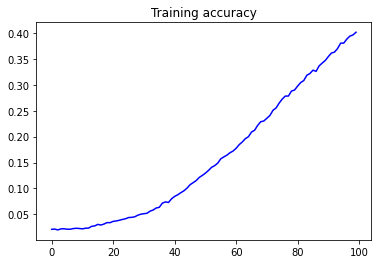

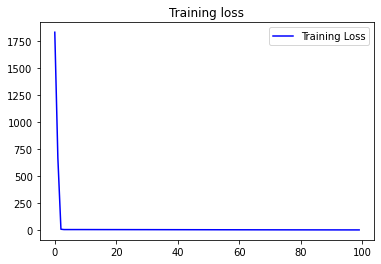

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [ ]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Help me Obi Wan Kenobi, you're my only hope of think on thee die grew esteem on muse seen praise twain kill part hath ' take made for days more dwell ' take more be more away i loved more ' live thou art not thee more true ' take or more true bright true age days seen haste with still thine eye thee days art write thou love still now hold my help to amiss steel crown'd me in fell decease meet gave age can then steal love stol'n me with mine eye you dear heart seen love groan but kings kings seen age bright pride of face
